# SPAM MESSAGES CLASSIFIER

### Workflow
This project will be divided in to 7 parts namely
1. Data Cleaning
2. Exploratory Data Analysis
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Application

### Importing Modules

In [1]:
import pandas as pd
import numpy as np

### Loading Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='latin')

### Basic Data Exploration

How our data looks like?

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


What are the dimensions of our dataset?

In [4]:
df.shape

(5572, 5)

What are the columns and their datatypes?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Are there any missing values?

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Are there any duplicate values?

In [7]:
df.duplicated().sum()

403

### Data Cleaning

First of all drop the unnamed columns as these columns do not contain useful values.

In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

Now let's rename the remaining columns to be more descriptive

In [9]:
df.rename(columns={'v1': 'target', 'v2': 'message'}, inplace=True)

In [10]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Before going any further, let's just encode the target variable using sklearn's LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Unfortunately, as we saw earlier our dataset contains duplicate values. Therefore it is crucial to remove those entries.

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

### Exploratory Data Analysis

Let's first see how  ham and spam values are distributed in our dataset.

In [15]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

To better visualize it, we are gonna use matplolib's pie plot.

In [16]:
import matplotlib.pyplot as plt

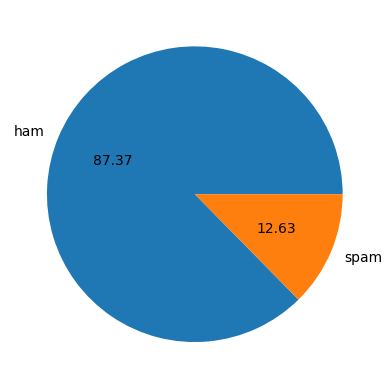

In [17]:
plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Hence we are sure that our data is **imbalanced** meaning there are more ham than spam.

Now let's see typically how many characters, words and sentences are there in messages.

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['n_characters'] = df['message'].apply(len)
df.head()

,target,message,n_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['n_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,message,n_characters,n_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['n_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,message,n_characters,n_words,n_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


now let's see how number of characters, words and sentences are distributed

In [23]:
df[['n_characters', 'n_words', 'n_sentences']].describe()

,n_characters,n_words,n_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Let's do the same thing for ham messages.

In [24]:
df[df['target'] == 0][['n_characters', 'n_words', 'n_sentences']].describe()

,n_characters,n_words,n_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


for spam messages

In [25]:
df[df['target'] == 1][['n_characters', 'n_words', 'n_sentences']].describe()

,n_characters,n_words,n_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


So, typically spam messages are longer as described above. They contain more characters, words and sentences as compared to ham messages.

let's now better visualize it using seaborn

In [26]:
import seaborn as sns

<Axes: xlabel='n_characters', ylabel='Count'>

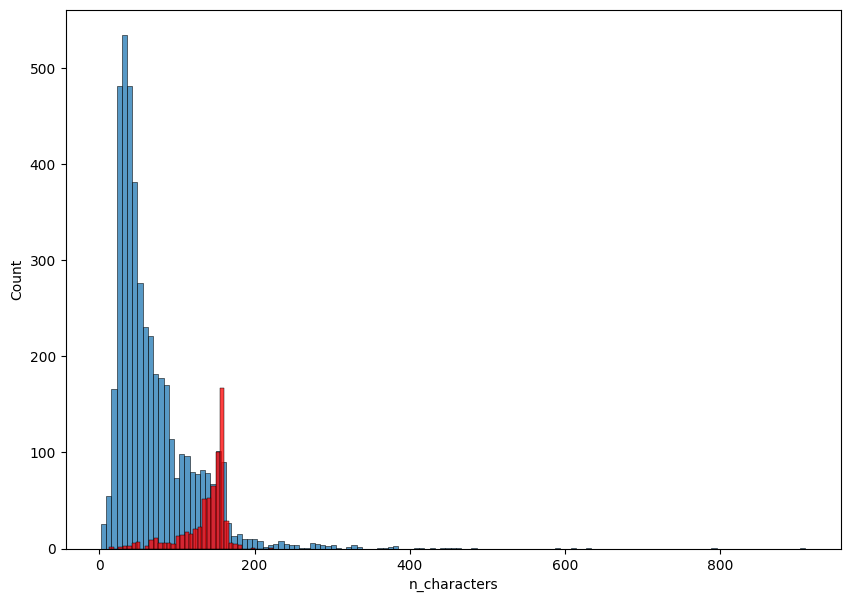

In [29]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df['target'] == 0]['n_characters'])
sns.histplot(df[df['target'] == 1]['n_characters'], color='red')

<Axes: xlabel='n_words', ylabel='Count'>

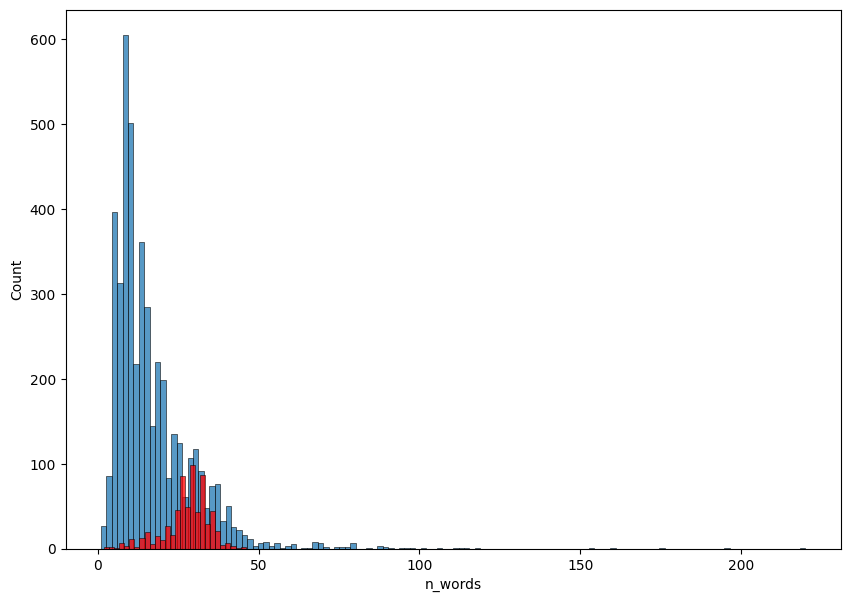

In [30]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df['target'] == 0]['n_words'])
sns.histplot(df[df['target'] == 1]['n_words'], color='red')

These graphs implies the same conclusion.

Now let's see how character, words, and sentences and target are related with each other using pairplot

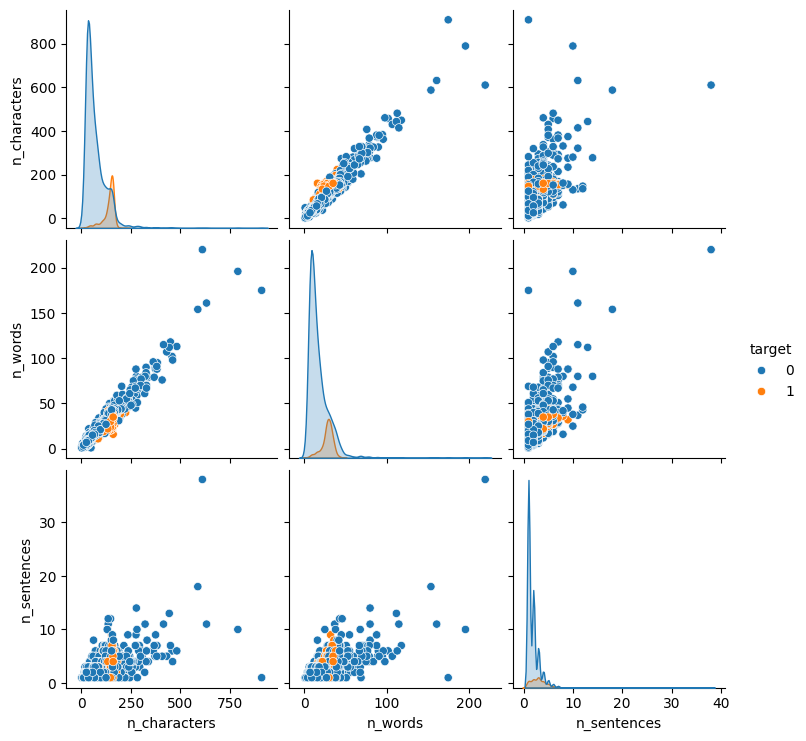

In [31]:
sns.pairplot(df,hue='target')

Last thing to check before moving towards text preprocessing is pearson correlation coefficient. We will visualize it using `sns.heatmap`

<ipython-input-32-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

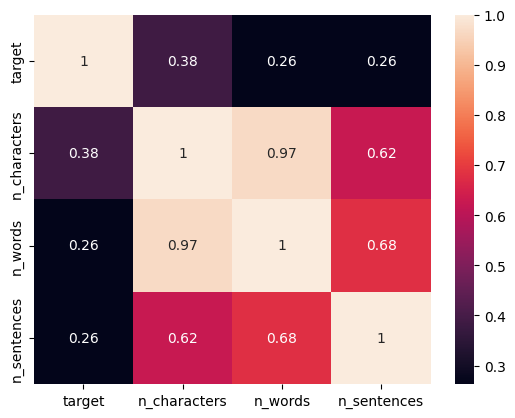

In [32]:
sns.heatmap(df.corr(),annot=True)

It can be seen that n_words, n_characters and n_sentences have large correlation with each other. Hence to avoid collinearity we will only consider one of them.